In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
class Cryptopaisa:
  def __init__(self,name,dataframe):
    self.name = name #btc,etherium wagera
    self.df = dataframe

  def getdf(self):
    return self.df


  def clean_data(self):
    self.df.columns = self.df.columns.str.strip()
    self.df.date = pd.to_datetime(self.df.date)
    self.df.drop_duplicates(inplace = True)

  def handle_missing(self):
    self.df.interpolate(inplace= True)

  def calc_log_returns(self):
    self.df['log_returns'] = np.log(self.df.price/self.df.price.shift(1))

  def extreme_dates(self):
    max_index = self.df.log_returns.idxmax()
    max_date = self.df.loc[max_index,'date'].date() #adding .date() to strip off time
    max_return = self.df.loc[max_index,'log_returns'].round(3)

    min_index = self.df.log_returns.idxmin()
    min_date = self.df.loc[min_index,'date'].date()
    min_return = self.df.loc[min_index,'log_returns'].round(3)

    print(f'Highest return for {self.name} was on {max_date} ({max_return})')
    print(f'Lowest return for {self.name} was on {min_date} ({min_return})')

  def draw_line(self):
    plt.figure(figsize=(12, 5))
    plt.plot(self.df.date,self.df.price)
    plt.title(f"Historical price for {self.name}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()
  def draw_bar(self):
    plt.figure(figsize=(12, 5))
    plt.bar(self.df.date, self.df.price, width=0.6)
    plt.title(f"Historical price for {self.name}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()


Highest return for Bitcoin was on 2025-08-11 (0.023)
Lowest return for Bitcoin was on 2025-08-02 (-0.022)


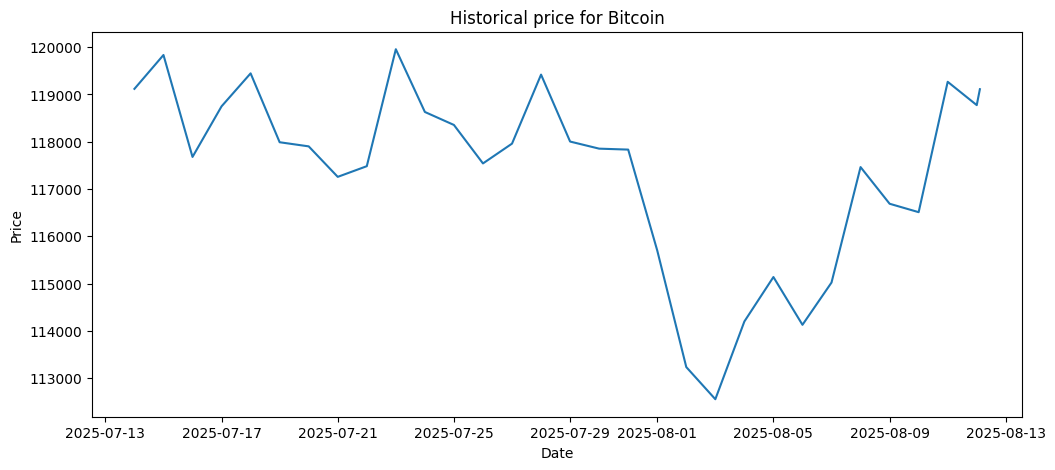

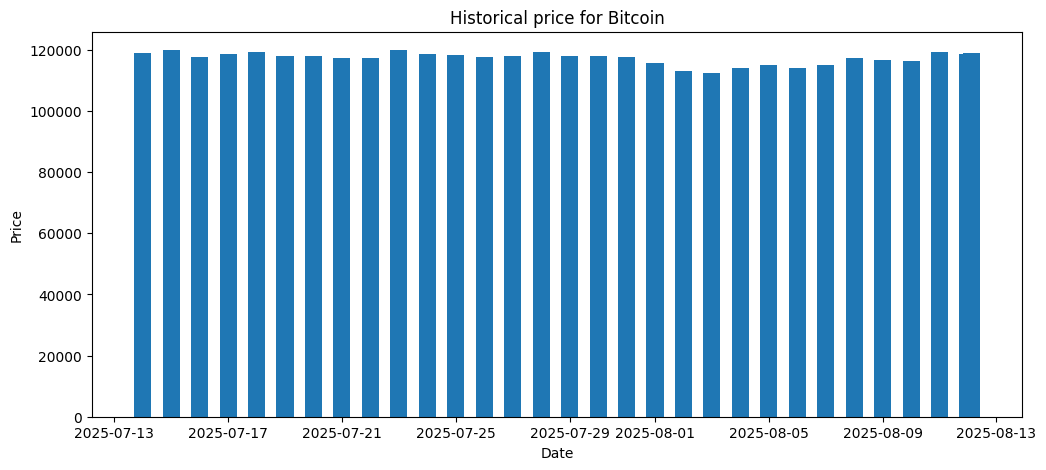

In [6]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart" #specify currency in link
parameters = {'vs_currency':'usd','days':'30','interval':'daily'}
response = requests.get(url,params = parameters)

data = response.json()
prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
prices.drop('timestamp', axis=1, inplace=True)

btc = Cryptopaisa("Bitcoin",prices)
btc.clean_data()
btc.handle_missing()
btc.calc_log_returns()
btc.extreme_dates()
btc.draw_line()
btc.draw_bar()
btc.df.rename(columns={'log_returns': 'btc_log'}, inplace=True)


Highest return for ethereum was on 2025-07-17 (0.072)
Lowest return for ethereum was on 2025-08-02 (-0.059)


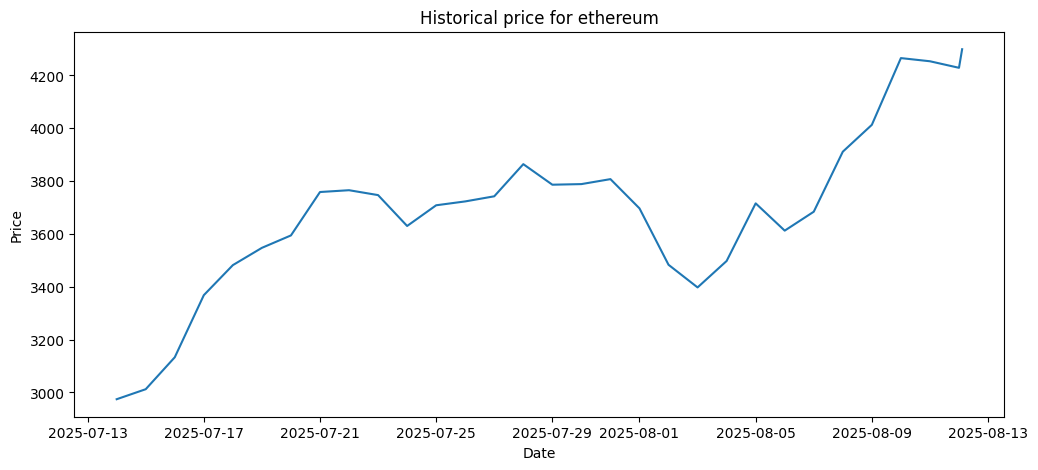

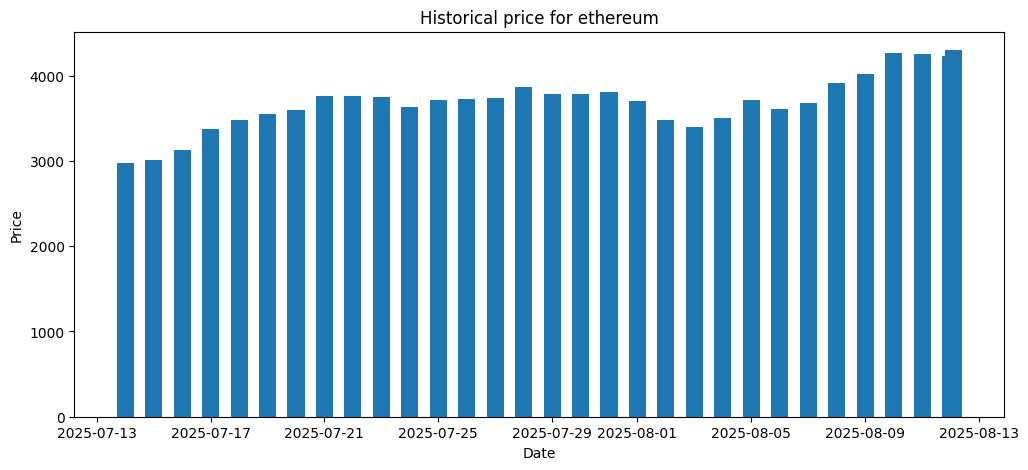

In [7]:
#cleaning data code from onward[will be integrated into the class later]


url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart" #specify currency in link
parameters = {'vs_currency':'usd','days':'30','interval':'daily'}
response = requests.get(url,params = parameters)

data = response.json()
prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
prices.drop('timestamp', axis=1, inplace=True)

etc = Cryptopaisa("ethereum",prices)
etc.clean_data()
etc.handle_missing()
etc.calc_log_returns()
etc.extreme_dates()
etc.draw_line()
etc.draw_bar()

etc.df.rename(columns={'log_returns': 'etc_log'}, inplace=True)



Highest return for Ripple was on 2025-07-18 (0.139)
Lowest return for Ripple was on 2025-07-24 (-0.111)


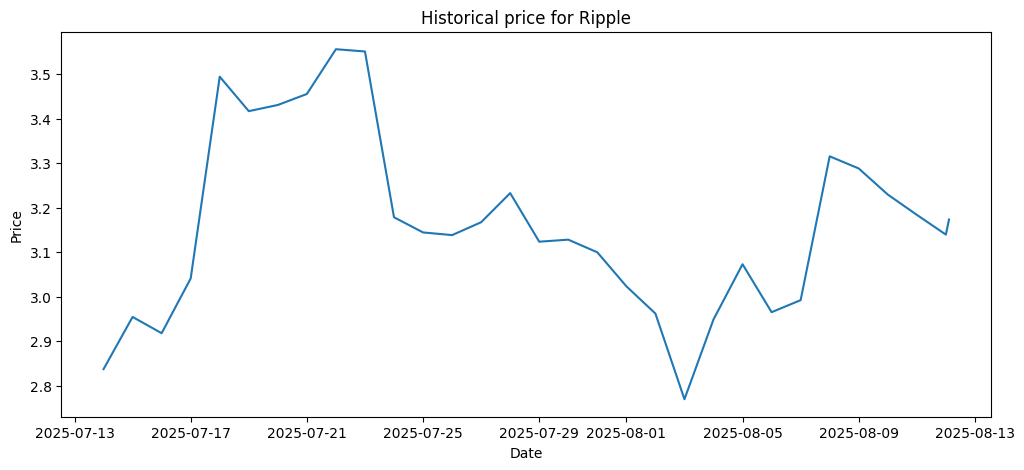

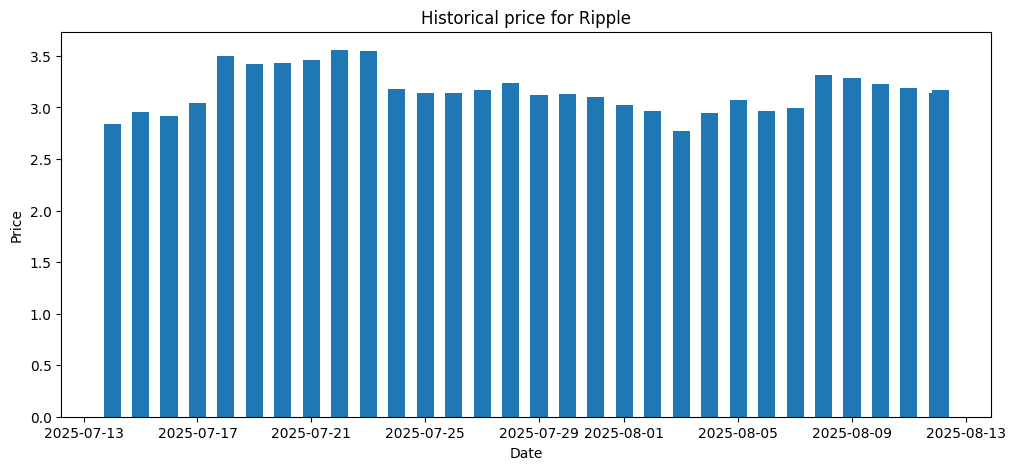

In [8]:
url = "https://api.coingecko.com/api/v3/coins/ripple/market_chart"
parameters = {'vs_currency':'usd','days':'30','interval':'daily'}
response = requests.get(url, params=parameters)

data = response.json()
prices = pd.DataFrame(data["prices"], columns=["timestamp", "price"])
prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms")
prices.drop('timestamp', axis=1, inplace=True)

rp = Cryptopaisa("Ripple", prices)
rp.clean_data()
rp.handle_missing()
rp.calc_log_returns()
rp.extreme_dates()
rp.draw_line()
rp.draw_bar()

rp.df.rename(columns={'log_returns': 'rp_log'}, inplace=True)

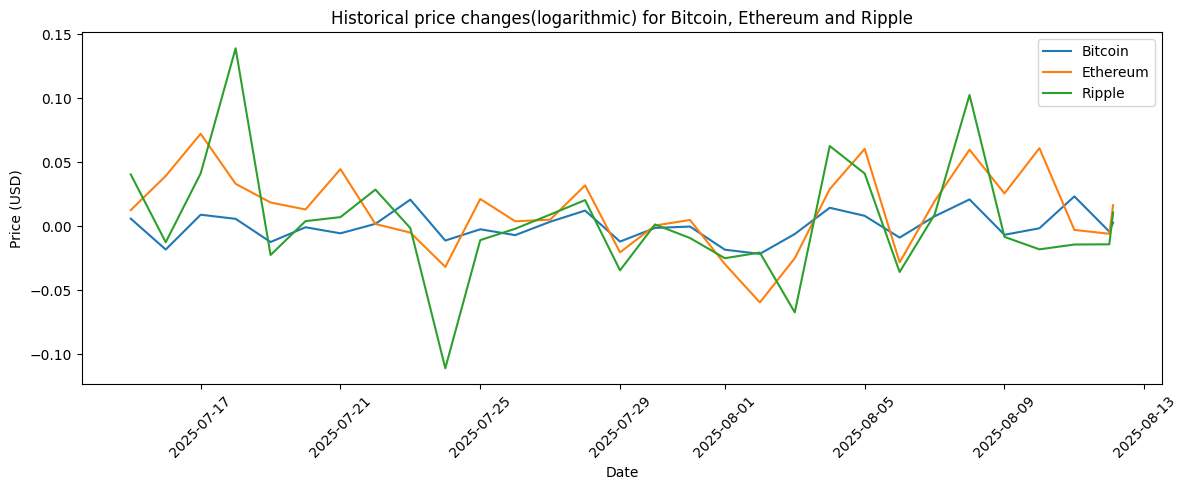

In [9]:
#combined plot to display all currencies changes over a period of a month nigga

plt.figure(figsize=(12, 5))
plt.plot(btc.df.date, btc.df.btc_log, label='Bitcoin')
plt.plot(etc.df.date, etc.df.etc_log, label='Ethereum')
plt.plot(rp.df.date, rp.df.rp_log, label='Ripple')

plt.title("Historical price changes(logarithmic) for Bitcoin, Ethereum and Ripple")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
merged_df = pd.DataFrame({'date': btc.df.date})

merged_df['btc_log'] = btc.df.btc_log
merged_df['etc_log'] = etc.df.etc_log
merged_df['rp_log'] = rp.df.rp_log

merged_df.set_index('date',inplace = True)


correlation_matrix = merged_df.corr()
print(correlation_matrix)

          btc_log   etc_log    rp_log
btc_log  1.000000  0.463840  0.566959
etc_log  0.463840  1.000000  0.603745
rp_log   0.566959  0.603745  1.000000
